# Hyperparameters and Cross-Validation
* there are some choices for certain algorithms that don't have precise solutions
* for instance: 
    * KNN: how do we choose K? 
    * Decision Tree: how do we choose the max depth? 
    * Bayes classifier: how to choose the likelihood distribution?
    * Perceptron: how do we choose the learning rate? 
* all of the above are hyper parameters: they can be discrete or continuous

# Hyperparameters - KNN
* sometimes we can use our knowledge of the algorithm to guide us 

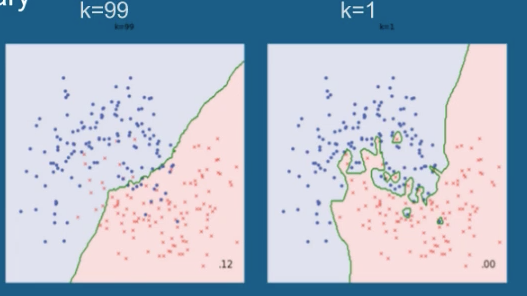

* we know for KNN if K = 1 we just look for the closest training point 
* this in turn leads to the finest decision boundary, which could lead to severe overfitting
* increasing K leads to a smoother boundary, but if K is too large it could lead to a poorer fit (too much bias)
* it could also take a long time to make predictions

# Hyperparameters - Decision Trees
* Decision trees have similar problem

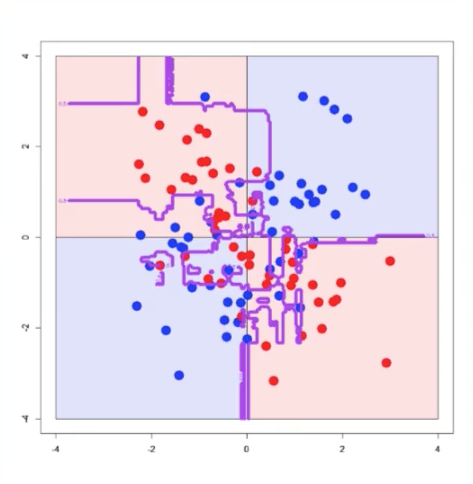

* if we don't limit the maximum depth, we could get 100% training accuracy 
* however we won't necessarily do well on the test set, since this will not generalize well
* If it is too shallow, it won't learn the pattern well 

# Hyperparameters - Generalization 
* the key idea here is that we want our classifier to do well on data it has not seen before
* this is called generalization
* this can be called test or validation data

# K-Fold Cross Validation
* one popular way to choose hyper parameters
* We start by splitting our data into K parts (typical values for K = 5, 8, 10)
* We do a loop that iterates K times 
* each time, we take out one part and use that as the validation set 

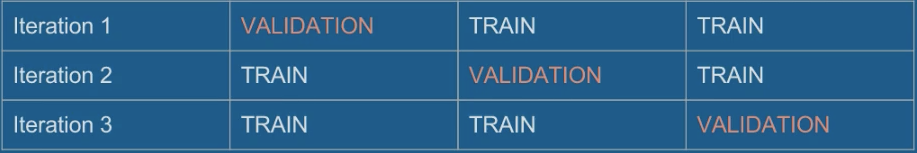

* it can be seen in pseudocode here:

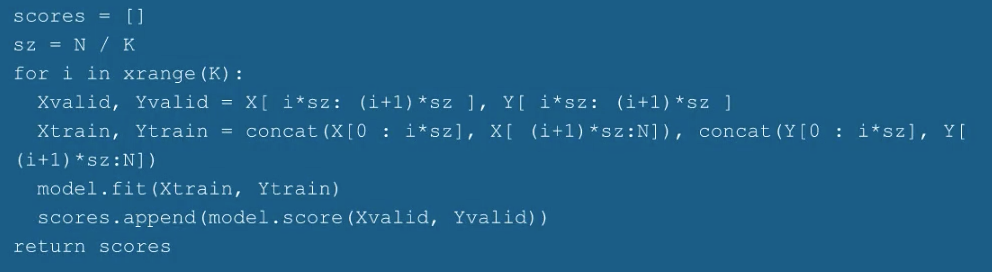

* we can see that this algorithm returns K different scores (accuracies)
* we can simply use the mean as a measurement for how good this hyperparameter is 
* another thing you can do is use statistical testing to see if there is a difference between the scores for two particular hyperparameter settings, to see if one is statistically more significant than the other! (t-test, chi square test)

# Sci-Kit Learn 
* scikit learn has a k folds implementation 

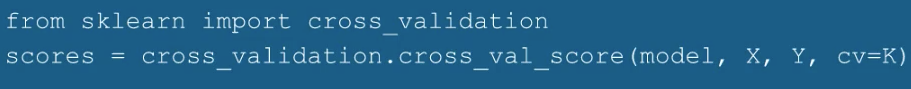



---
# Feature Extraction and Feature Selection
Lets first talk about feature extraction
## Feature Extraction
* how could we solve the donut problem using feature extraction? 
* create a radius measurement! And use that to solve. 
* often will need intimate domain knowledge 

# Feature Selection - Greedy method
* too many features leads to overfitting! 
* the greedy method helps prevent this 
* First, build a classifier for each individual feature, and see which one performs best via cross validation 
* this will be your most powerful feature
* Next, build another set of classifiers that all contain the first feature, and one additional one. 
* Save the classifier that performs the best out of this list, and now you have your 2 best features 
* repeat

# Automatic Extraction/Selection
* Another option is to use dimensionality reduction techiniques such as PCA (principle component analysis)
* this is an automatic method that doesn't require domain knowledge 
* The result leads to several desireable properties
* all outputs are uncorrelated (no redundancy)
* outputs are sorted by how much information they contain (measured by variance) 
* so you can choose a subset of a features that leads to retaining 95% or 99% of the original variance 
* one disadvantage is that PCA is only a linear transformation

---
# Comparison to Deep Learning 
* so far in certain cases training is very fast, but prediction is slow:
    * KNN
* in other cases we saw that training was slow, but prediction was fast:
    * Decision Tree
* In some cases both training and predicting are fast:
    * perceptron
* Deep learning can take multiple days!
* But scales well to data size! (doesn't need to all be loaded into RAM simultaneously)
* prediction is very fast, but not as fast as a linear model like a perceptron 

# Decision Boundary
* we have seen models that only have a linear or quadratic decision boundary 
* decision tree boundaries are orthogonal to axes
* Deep learning can find highly complex/nonlinear decision boundaries 
* in theory they can approximate any function 
* an advantage of deep learning is that there is no need to manually extract features with deep learning, (e.g. the donut problem)
* even steps like PCA/dimensionality reduction are done automatically by neural netwok, in a nonlinear manner 

# Interpretability 
# Hyperparameters 

---
# Multiclass Classification
* for the algorithms that don't support multiclass classification out of the box, you can do...
## One-vs-the-rest

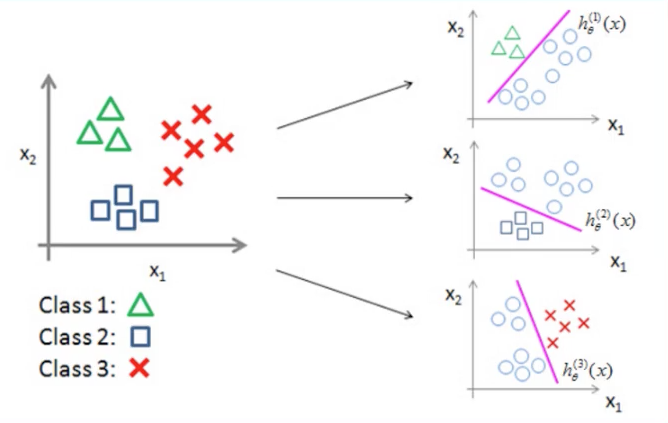

* write k different classifiers
* place data through all classifiers
* pick the one that yields highest score/votes
* this is problematic because training is slow
* secondly some just return a class, which could result in a tie
* this could also create class imbalances! 

## One-vs-One
* another option 

# Summary
* In this course we will not explore this much further 

# Sci-Kit Learn
* we built all models in a similar way to sci-kit learn (fit, predict, score)
* lets go through some very nice features of scikit learn

# Posterior Probability
* one big advantage of using a classifier like logistic regression, neural networks, or Bayes, is that we get p(C|X), a probabilistic measure of your output prediction
* For example if we get p(C|X) = 0.55, we are not as confident as if we get p(C|X) = 0.99
* With scikit learn, even decision trees and KNN get a probabilistic output!!!
* if available, it is found from a function called: **`model.predict_proba(X)`**
* sometimes we want p(C|X) rather than a rounded up prediction

# Area Under Curve (AUC) 

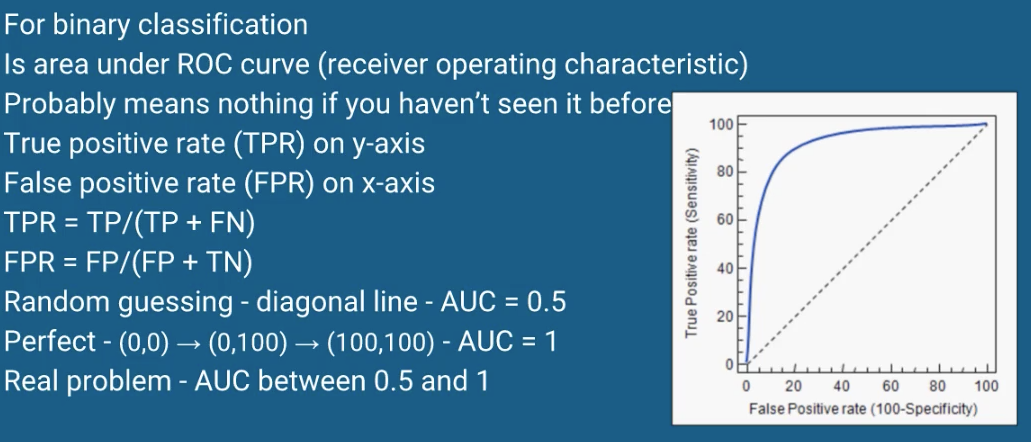

* in this scenario, we treat the output probability as a score between 0 and 1
* we typically choose 0.5 as threshold for p(C|X)
* but we can choose any threshold, i.e. 0.1, 0.3
* So the ROC curve is really just a plot of the TPR and FPR for different settings of the threshold from 0..1
* note there is only 1 threshold because this is binary classification 

# Imbalanced Classes
* another example of when we would want to use AUC to determine how good our model is, is when we have imbalanced classes

# AUC in code
* **`sklearn.metrics.roc_auc_score(y_true, y_score)`**
* first param: true labels
* second param: output probabilities 

# Classification vs. Regression 
* many scikit learn models do both classification and regression 
* example:
    * **`sklearn.neighbors.KNeighborsRegressor`**
    * **`sklearn.tree.DecisionTreeRegressor`**
* they still have the same basic api as before
* score used to return the classification rate, now it returns the R^2 score

# Saving and Loading models
* suppose you want to train a model offline and deploy it to multiple servers in your cluster 
* wouldn't want to train each individually/duplicate work 
* or your server may crash, in which case you would have to train model all over again
* scikit learn gives you the ability to save and load all models, so you can train it once and use it again later 
* we use the pickle library to do (this interface looks much like JSON)

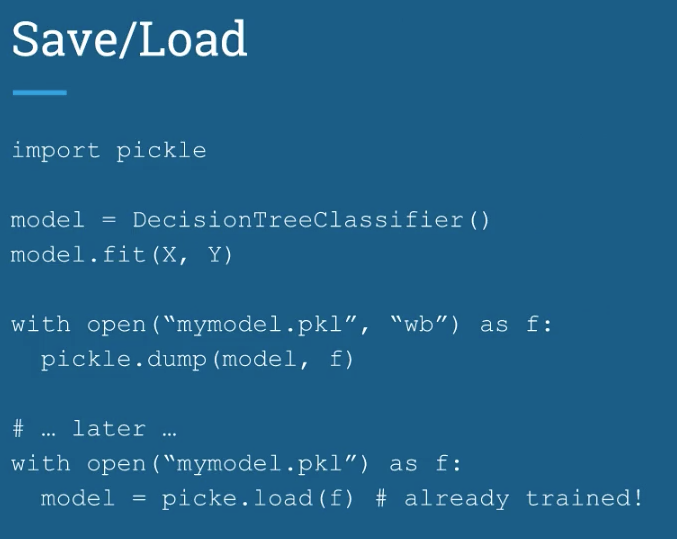

---
# Regression with SKLearn is Easy
* regression is predicting a real valued number rather than a category 
* lets do this with KNN and decision trees

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

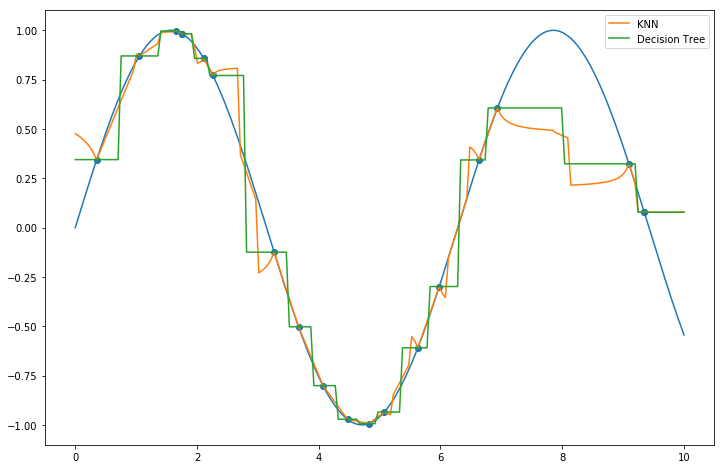

In [9]:
N = 200
X = np.linspace(0, 10, N).reshape(N,1)
Y = np.sin(X)

NTrain = 20
idx = np.random.choice(N, NTrain)
Xtrain = X[idx]
Ytrain = Y[idx]

knn = KNeighborsRegressor(n_neighbors=2, weights='distance')
knn.fit(Xtrain, Ytrain)
Yknn = knn.predict(X)

dt = DecisionTreeRegressor()
dt.fit(Xtrain, Ytrain)
Ydt = dt.predict(X)

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(Xtrain, Ytrain)
plt.plot(X, Y)
plt.plot(X, Yknn, label='KNN')
plt.plot(X, Ydt, label='Decision Tree')
plt.legend()
plt.show()

# Results 
* lets discuss the decision tree first
* it passes through all of the points, but it is perhaps overfitting, since we didn't pass in any parameters to control the maximum depth of the tree
* hence, it just kept making splits until it reached the stopping criteria
* For KNN, we set the number of neighbors to 2
* we can see that KNN just picked the two closest neighbors and predicted the average of those two points
* it turned out very blocky, just like the decision tree
* a simple modification like weighting the average of the distance from those two points could perhaps make this better 